<a href="https://colab.research.google.com/github/quangkhai4078/phantichdulieu/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
#thư viện này để hiển thị các tấm ảnh
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [2]:
# để chọn ngẫu nhiên cá tấm ảnh
import random
import os

In [3]:
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
from keras.models import load_model
from matplotlib import image

In [4]:
# cấc hàm sau để xây dựng mô hình mạng neural
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print("x_trainshape",x_train.shape)

x_trainshape (60000, 28, 28)


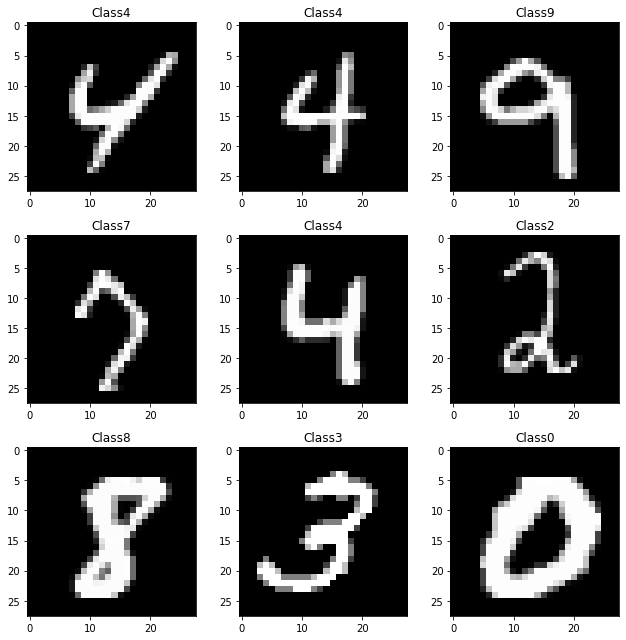

In [8]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class{}'.format(y_train[num]))
plt.tight_layout()

In [9]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train/=255

In [10]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

In [12]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

In [14]:
model=Sequential()
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics =['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=5,verbose=2,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 8,700
Trainable params: 8,700
Non-trainabl

In [16]:
save_dir="/results/"
model_name='keras_mnist.h5'
model_path=os.path.join(save_dir,model_name)
model.save(model_path)
print('Savedtrainedmodelat%s'%model_path)

Savedtrainedmodelat/results/keras_mnist.h5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upperright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


313/313 - 0s - loss: 0.2130 - accuracy: 0.9417 - 460ms/epoch - 1ms/step
TestLoss 0.21298271417617798
TestAccuracy 0.9416999816894531


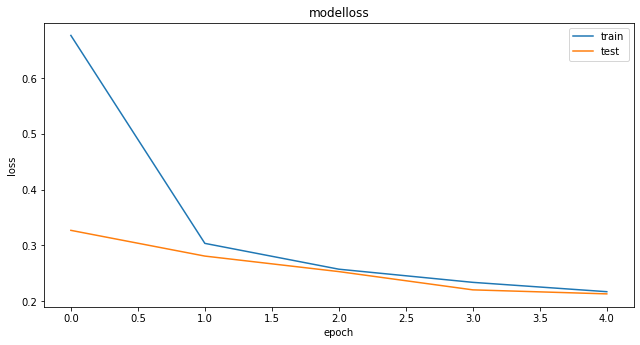

In [17]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelloss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upperright')
plt.tight_layout ()
mnist_model=load_model(model_path)
loss_and_metrics=mnist_model.evaluate(x_test,y_test,verbose=2)
print("TestLoss",loss_and_metrics[0])
print("TestAccuracy",loss_and_metrics[1])